<a href="https://colab.research.google.com/github/Astha-L/Astha/blob/NM-Phase-2/NM_Phase_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Fake.csv.zip to Fake.csv (2).zip

Uploaded file: Fake.csv (2).zip
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  

Total tokens: 10215966


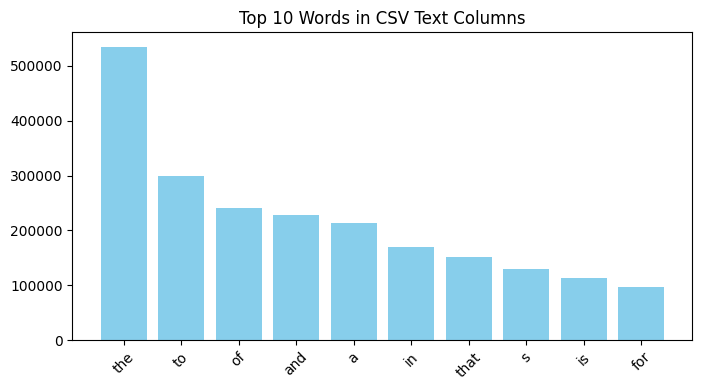


Matched fake keywords: {'sample', 'abc', 'test', 'dummy'}

Extracted Features:
num_tokens: 10215966
unique_tokens: 178818
fake_keywords_count: 1979
avg_word_length: 4.881900656100396
text_length: 62597710

--- FINAL RESULT ---
FAKE CSV DETECTED
Reason:
- Contains known fake keywords.


In [5]:
# ---------------------------------------
# 1. Data Collection (File Upload)
# ---------------------------------------
from google.colab import files
import pandas as pd

uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
print(f"\nUploaded file: {filename}")
print(df.head())

# ---------------------------------------
# 2. Data Preprocessing
# ---------------------------------------
import re

# Combine all text columns
df = df.fillna('')
text_cols = df.select_dtypes(include='object')
combined_text = text_cols.apply(lambda col: ' '.join(col.astype(str)), axis=0).tolist()
combined_text = ' '.join(combined_text)

# Clean text
cleaned_text = re.sub(r'[^A-Za-z\s]', '', combined_text).lower()

# Tokenization
tokens = cleaned_text.split()

print(f"\nTotal tokens: {len(tokens)}")

# ---------------------------------------
# 3. EDA
# ---------------------------------------
import matplotlib.pyplot as plt
from collections import Counter

word_freq = Counter(tokens)
top_words = word_freq.most_common(10)

# Bar chart of top 10 words
words, freqs = zip(*top_words)
plt.figure(figsize=(8, 4))
plt.bar(words, freqs, color='skyblue')
plt.title("Top 10 Words in CSV Text Columns")
plt.xticks(rotation=45)
plt.show()

# Check for fake-like keywords
fake_keywords = ['lorem', 'ipsum', 'test', 'dummy', 'sample', 'abc', 'xyz']
matched = [word for word in tokens if word in fake_keywords]
print(f"\nMatched fake keywords: {set(matched)}")

# ---------------------------------------
# 4. Feature Engineering
# ---------------------------------------
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform([' '.join(tokens)])

features = {
    "num_tokens": len(tokens),
    "unique_tokens": len(set(tokens)),
    "fake_keywords_count": len(matched),
    "avg_word_length": sum(len(w) for w in tokens) / (len(tokens) + 1),
    "text_length": len(combined_text)
}

print("\nExtracted Features:")
for k, v in features.items():
    print(f"{k}: {v}")

# ---------------------------------------
# 5. Model Building (Rule-Based for Now)
# ---------------------------------------
# A very simple rule-based classifier
is_fake = (
    features["fake_keywords_count"] > 2 or
    features["unique_tokens"] < 10 or
    features["avg_word_length"] < 4
)

# ---------------------------------------
# 6. Visualization & Output
# ---------------------------------------
print("\n--- FINAL RESULT ---")
print("FAKE CSV DETECTED" if is_fake else "REAL CSV DETECTED")
print("Reason:")
if is_fake:
    if features["fake_keywords_count"] > 2:
        print("- Contains known fake keywords.")
    if features["unique_tokens"] < 10:
        print("- Very few unique words.")
    if features["avg_word_length"] < 4:
        print("- Very short word lengths.")
else:
    print("- Text appears natural and sufficiently complex.")
